In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

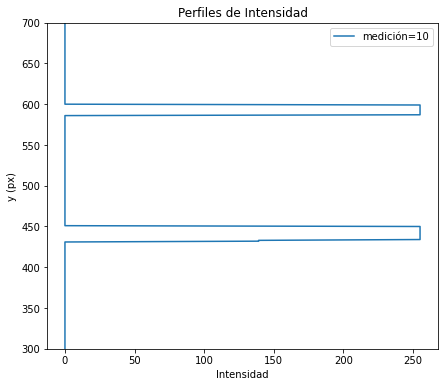

In [5]:
archivo = "medicionP30V200.txt"
data = pd.read_csv(archivo)
xs = sorted(data["x_position"].unique())

plt.figure(figsize=(7,6))
#for x in xs:
#    perfil = data[data["x_position"] == x]
#    y = perfil[" y"].values[300:700]
#    I = perfil[" intensity"].values[300:700]
#    plt.plot(I, y, label=f"x={int(x)} px")

x = 10
perfil = data[data["x_position"] == x]
y = perfil[" y"].values
I = perfil[" intensity"].values
plt.plot(I, y, label=f"medición={int(x)}")
plt.gca().invert_yaxis()
plt.ylim([300,700])
plt.xlabel("Intensidad")
plt.ylabel("y (px)")
plt.title("Perfiles de Intensidad")
plt.legend()
plt.savefig("perfil_intensidad_borde.jpg")
plt.show()

In [107]:
threshold = 128  # nivel para considerar "zona de corte"
gap_max = 20      # distancia máxima en píxeles para unir bloques

def unir_bloques(bloques, y, gap_max):
    if not bloques:
        return []
    bloques_unidos = [list(bloques[0])]
    for b in bloques[1:]:
        prev = bloques_unidos[-1]
        if abs(y[b[0]] - y[prev[1]]) <= gap_max:
            prev[1] = b[1]
        else:
            bloques_unidos.append(list(b))
    return [(b[0], b[1]) for b in bloques_unidos]

resultados = []

for x_val in sorted(data["x_position"].unique()):
    
    perfil = data[data["x_position"] == x_val]
    y = perfil[" y"].values[300:700]
    I = perfil[" intensity"].values[300:700]
    
    high = I > threshold
    
    bloques = []
    inicio = None
    for i in range(len(high)):
        if high[i] and inicio is None:
            inicio = i
        elif not high[i] and inicio is not None:
            bloques.append((inicio, i-1))
            inicio = None
    if inicio is not None:
        bloques.append((inicio, len(high)-1))
    
    # Unir bloques cercanos
    bloques = unir_bloques(bloques, y, gap_max)

    # Calcular centros
    centros = [(y[b[0]] + y[b[1]]) / 2 for b in bloques]
    
    if len(centros) >= 2:
        ancho = abs(centros[1] - centros[0])
    else:
        ancho = np.nan
    
    resultados.append((x_val, centros, ancho))

for r in resultados:
    print(f"x={r[0]} px → centros = {r[1]} → ancho = {r[2]} px")


x=1 px → centros = [np.float64(436.5), np.float64(579.0)] → ancho = 142.5 px
x=2 px → centros = [np.float64(442.0), np.float64(583.0)] → ancho = 141.0 px
x=3 px → centros = [np.float64(441.0), np.float64(582.0)] → ancho = 141.0 px
x=4 px → centros = [np.float64(446.0), np.float64(581.0)] → ancho = 135.0 px
x=5 px → centros = [np.float64(444.0), np.float64(579.5)] → ancho = 135.5 px
x=6 px → centros = [np.float64(445.5), np.float64(575.5)] → ancho = 130.0 px
x=7 px → centros = [np.float64(446.0), np.float64(574.0)] → ancho = 128.0 px
x=8 px → centros = [np.float64(447.5), np.float64(585.0)] → ancho = 137.5 px
x=9 px → centros = [np.float64(451.0), np.float64(584.5)] → ancho = 133.5 px
x=10 px → centros = [np.float64(441.0), np.float64(593.0)] → ancho = 152.0 px


In [108]:
scale = 511.25 #px/mm
sum = 0
anchos_corte = np.zeros(len(resultados))
for i in range(len(resultados)):
    sum += resultados[i][2]
    anchos_corte[i] = resultados[i][2]/scale
mean_width = sum / len(resultados)
mean_width = mean_width / scale
print(f"Ancho promedio de corte: {mean_width:.3f} mm.")
desv = np.std(anchos_corte)
print(f"Desviación estandar de corte: {desv:.3f}.")


Ancho promedio de corte: 0.269 mm.
Desviación estandar de corte: 0.013.


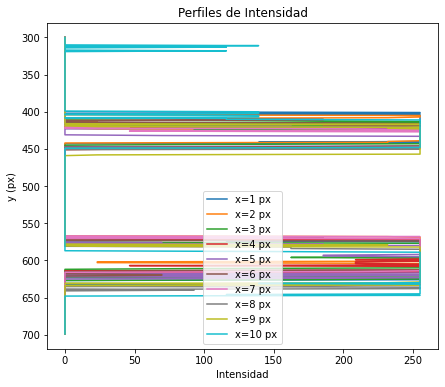

In [87]:
archivo = "bordesP30V200.txt"
data = pd.read_csv(archivo)
xs = sorted(data["x_position"].unique())

plt.figure(figsize=(7,6))
for x in xs:
    perfil = data[data["x_position"] == x]
    y = perfil[" y"].values[300:700]
    I = perfil[" intensity"].values[300:700]
    plt.plot(I, y, label=f"x={int(x)} px")

#x =1
#perfil = data[data["x_position"] == x]
#y = perfil[" y"].values[300:700]
#I = perfil[" intensity"].values[300:700]
#plt.plot(I, y, label=f"x={int(x)} px")
plt.gca().invert_yaxis()
#plt.ylim([300,650])
plt.xlabel("Intensidad")
plt.ylabel("y (px)")
plt.title("Perfiles de Intensidad")
plt.legend()
plt.show()

In [89]:
threshold = 128  # nivel para considerar "zona de corte"
gap_max = 20      # distancia máxima en píxeles para unir bloques

def unir_bloques(bloques, y, gap_max):
    if not bloques:
        return []
    bloques_unidos = [list(bloques[0])]
    for b in bloques[1:]:
        prev = bloques_unidos[-1]
        if abs(y[b[0]] - y[prev[1]]) <= gap_max:
            prev[1] = b[1]
        else:
            bloques_unidos.append(list(b))
    return [(b[0], b[1]) for b in bloques_unidos]

resultados = []

for x_val in sorted(data["x_position"].unique()):
    
    perfil = data[data["x_position"] == x_val]
    y = perfil[" y"].values[300:700]
    I = perfil[" intensity"].values[300:700]
    
    high = I > threshold
    
    bloques = []
    inicio = None
    for i in range(len(high)):
        if high[i] and inicio is None:
            inicio = i
        elif not high[i] and inicio is not None:
            bloques.append((inicio, i-1))
            inicio = None
    if inicio is not None:
        bloques.append((inicio, len(high)-1))
    
    # Unir bloques cercanos
    bloques = unir_bloques(bloques, y, gap_max)

    # Calcular ancho de las zonas quemadas
    ancho_superior = bloques[0][1] - bloques[0][0]
    ancho_inferior = bloques[1][1] - bloques[1][0]
    
    resultados.append((x_val, ancho_superior, ancho_inferior))

for r in resultados:
    print(f"medición={r[0]} → franja superior = {r[1]} → franja inferior = {r[2]} px")


medición=1 → franja superior = 41 → franja inferior = 54 px
medición=2 → franja superior = 36 → franja inferior = 48 px
medición=3 → franja superior = 31 → franja inferior = 49 px
medición=4 → franja superior = 27 → franja inferior = 44 px
medición=5 → franja superior = 25 → franja inferior = 46 px
medición=6 → franja superior = 37 → franja inferior = 44 px
medición=7 → franja superior = 25 → franja inferior = 47 px
medición=8 → franja superior = 32 → franja inferior = 56 px
medición=9 → franja superior = 40 → franja inferior = 54 px
medición=10 → franja superior = 0 → franja inferior = 48 px


In [90]:
scale = 511.25 #px/mm
sum_sup = 0
sum_inf = 0
anchos_sup = np.zeros(len(resultados))
anchos_inf = np.zeros(len(resultados))

for i in range(len(resultados)):
    sum_sup += resultados[i][1]/scale
    sum_inf += resultados[i][2]/scale
mean_width = ((sum_sup / len(resultados))+(sum_inf / len(resultados))) / 2
print(f"Ancho promedio de la zona quemada: {mean_width:.3f} mm.")

anchos1 = []
anchos2 = []
for i in range(len(resultados)):
    anchos1.append(resultados[i][1]/scale)
for i in range(len(resultados)):
    anchos2.append(resultados[i][2]/scale)

anchos = anchos1 + anchos2
desv = np.std(anchos)
print(f"Desviación estandar de la zona quemada: {desv:.3f}.")


Ancho promedio de la zona quemada: 0.077 mm.
Desviación estandar de la zona quemada: 0.025.
